In [1]:
import urllib3, requests, json

# retrieve your wml_service_credentials_username, wml_service_credentials_password, and wml_service_credentials_url from the
# Service credentials associated with your IBM Cloud Watson Machine Learning Service instance

wml_credentials={
  "username": "4e4ba1ce-3973-47ec-8c66-e616074a762c",
  "password": "bf88696c-9d83-44ab-a2d0-527eaee77730",
  "instance_id": "371b6e74-7b3c-43a7-949b-e12ca9051a6d",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}


In [2]:
#!pip install urllib3

In [3]:
#!pip install requests
input_val=[1,5.1,3.5,1.4,0.2]

In [4]:
headers = urllib3.util.make_headers(basic_auth='{username}:{password}'.format(username=wml_credentials['username'], password=wml_credentials['password']))
url = '{}/v3/identity/token'.format(wml_credentials['url'])
response = requests.get(url, headers=headers)
mltoken = json.loads(response.text).get('token')

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"fields": ["Id", "SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"], "values":[input_val]}

response_scoring = requests.post('https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/371b6e74-7b3c-43a7-949b-e12ca9051a6d/published_models/7afd221d-ecd1-4073-be4c-beffc7cbd6ee/deployments/7c8a772f-3762-402e-acf8-2cab64c2b5d5/online', json=payload_scoring, headers=header)
print("Scoring response")
print(json.loads(response_scoring.text))

Scoring response
{'fields': ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'features', 'rawPrediction', 'probability', 'prediction', 'nodeADP_class', 'nodeADP_classes'], 'values': [[1, 5.1, 3.5, 1.4, 0.2, [0.022793264688710128, 6.333533266602258, 7.2907317083255405, 0.8021011546858541, 0.26089666488870017], [0.0, 20.0, 0.0], [0.0, 1.0, 0.0], 1.0, 'Iris-setosa', ['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']]]}


In [5]:
import os
import pandas as pd
import numpy as np

In [6]:
os.getcwd()

'C:\\Users\\dell\\Documents'

In [7]:
os.chdir('C:/Users/dell/Desktop/datas')

In [8]:
data=pd.read_csv('diabetes.csv')

In [9]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
data.apply(lambda x:sum(x.isnull()),axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
corr=data.corr()
corr


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [17]:
import seaborn as sns

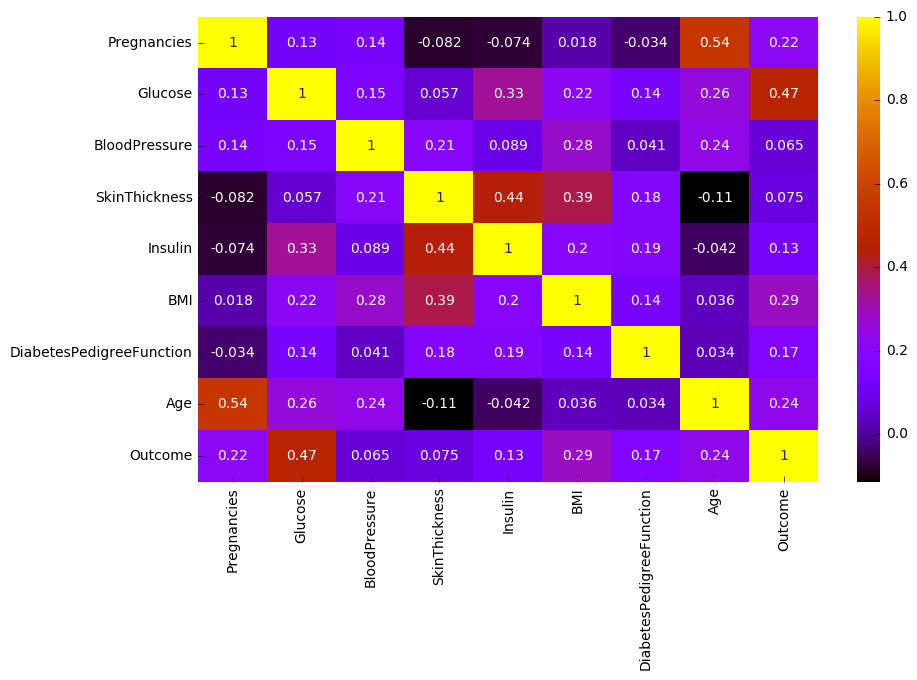

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='gnuplot')
plt.show()

In [19]:
x=data.iloc[:,:-1].values

In [20]:
x

array([[   6.   ,  148.   ,   72.   , ...,   33.6  ,    0.627,   50.   ],
       [   1.   ,   85.   ,   66.   , ...,   26.6  ,    0.351,   31.   ],
       [   8.   ,  183.   ,   64.   , ...,   23.3  ,    0.672,   32.   ],
       ..., 
       [   5.   ,  121.   ,   72.   , ...,   26.2  ,    0.245,   30.   ],
       [   1.   ,  126.   ,   60.   , ...,   30.1  ,    0.349,   47.   ],
       [   1.   ,   93.   ,   70.   , ...,   30.4  ,    0.315,   23.   ]])

In [21]:
y=data.iloc[:,-1].values

In [22]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1,

In [23]:
data.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

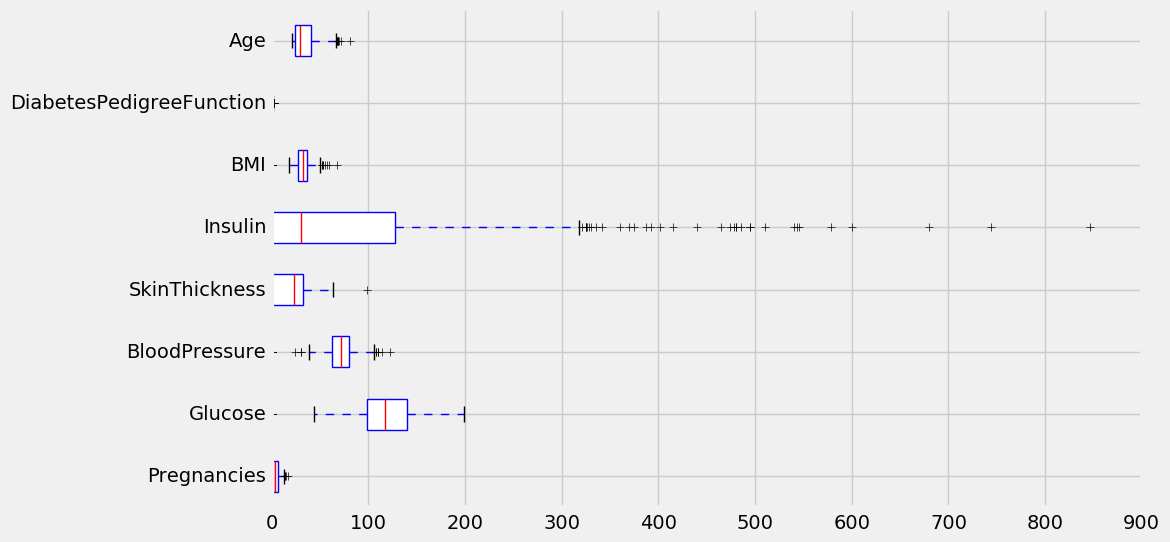

In [24]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
plt.boxplot(x,vert=False,labels=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],patch_artist=True)
plt.show()

In [25]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [26]:
mms=MinMaxScaler()
sc=StandardScaler()

In [27]:
x_mms=mms.fit_transform(x)
x_sc=sc.fit_transform(x)

In [28]:
x_mms

array([[ 0.35294118,  0.74371859,  0.59016393, ...,  0.50074516,
         0.23441503,  0.48333333],
       [ 0.05882353,  0.42713568,  0.54098361, ...,  0.39642325,
         0.11656704,  0.16666667],
       [ 0.47058824,  0.91959799,  0.52459016, ...,  0.34724292,
         0.25362938,  0.18333333],
       ..., 
       [ 0.29411765,  0.6080402 ,  0.59016393, ...,  0.390462  ,
         0.07130658,  0.15      ],
       [ 0.05882353,  0.63316583,  0.49180328, ...,  0.4485842 ,
         0.11571307,  0.43333333],
       [ 0.05882353,  0.46733668,  0.57377049, ...,  0.45305514,
         0.10119556,  0.03333333]])

In [29]:
x_sc

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ..., 
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

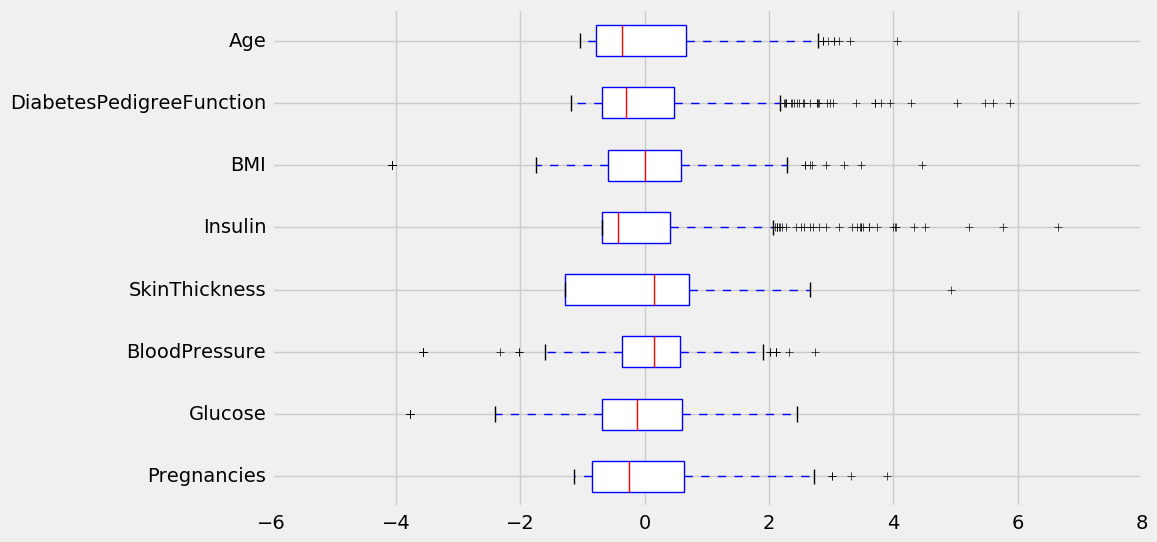

In [30]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
plt.boxplot(x_sc,vert=False,labels=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],patch_artist=True)
plt.show()

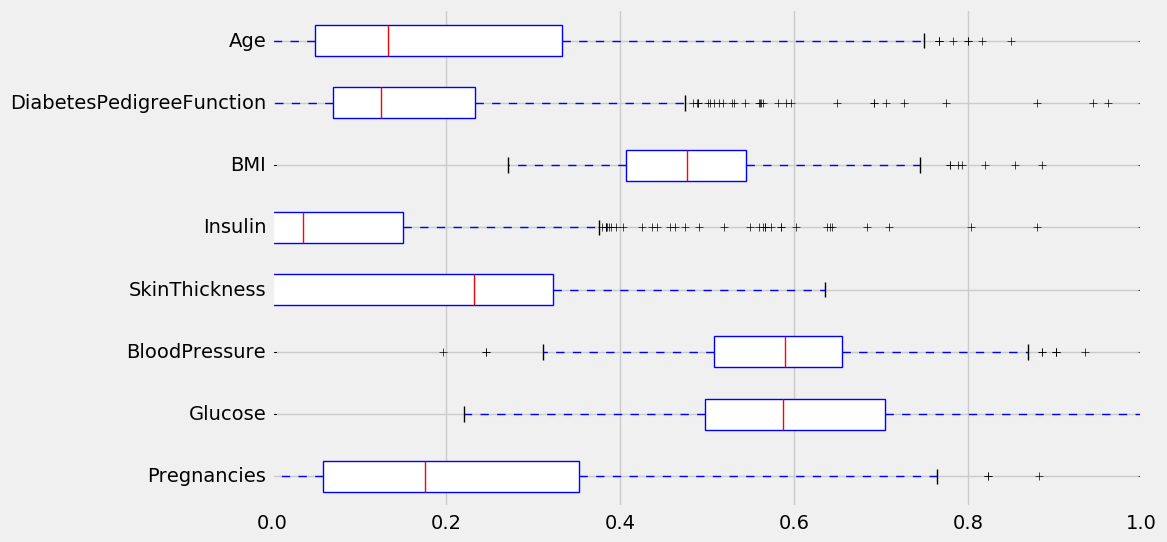

In [31]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
plt.boxplot(x_mms,vert=False,labels=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],patch_artist=True)
plt.show()

In [33]:
x_sc.shape

(768, 8)

In [34]:
y.shape

(768,)

In [35]:
y.reshape

<function ndarray.reshape>

In [36]:
x_sc.reshape

<function ndarray.reshape>

In [37]:
y=y.reshape([-1,1])#convert to column matrix
y.shape

(768, 1)

In [38]:
z_x=pd.DataFrame(x_sc)
z_x

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111
7,1.827813,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847
8,-0.547919,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259
9,1.233880,0.128489,1.390387,-1.288212,-0.692891,-4.060474,-0.724455,1.766346


In [39]:
z_y=pd.DataFrame(y)
z_y

,0
0,1
1,0
2,1
3,0
4,1
5,0
6,1
7,0
8,1
9,1


In [41]:
z=pd.concat((z_x,z_y),axis=1)

In [43]:
z.head()

,0,1,2,3,4,5,6,7,0
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [44]:
z.columns=list(range(0,9))

In [45]:
cond=abs(z)<2
z=z[cond]

In [46]:
z

,0,1,2,3,4,5,6,7,8
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,NaN,-0.020496,1
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760,0
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111,1
7,1.827813,-0.184482,NaN,-1.288212,-0.692891,0.419775,-1.020427,-0.360847,0
8,-0.547919,NaN,0.046245,1.534551,NaN,-0.189437,-0.947944,1.681259,1
9,1.233880,0.128489,1.390387,-1.288212,-0.692891,NaN,-0.724455,1.766346,1


In [47]:
# remove outlayers
z=z.dropna(axis=0)

In [48]:
x_new=z.iloc[:,:-1].values
y_new=z.iloc[:,-1].values


In [49]:
x_new.shape

(551, 8)

In [50]:
y_new.shape

(551,)

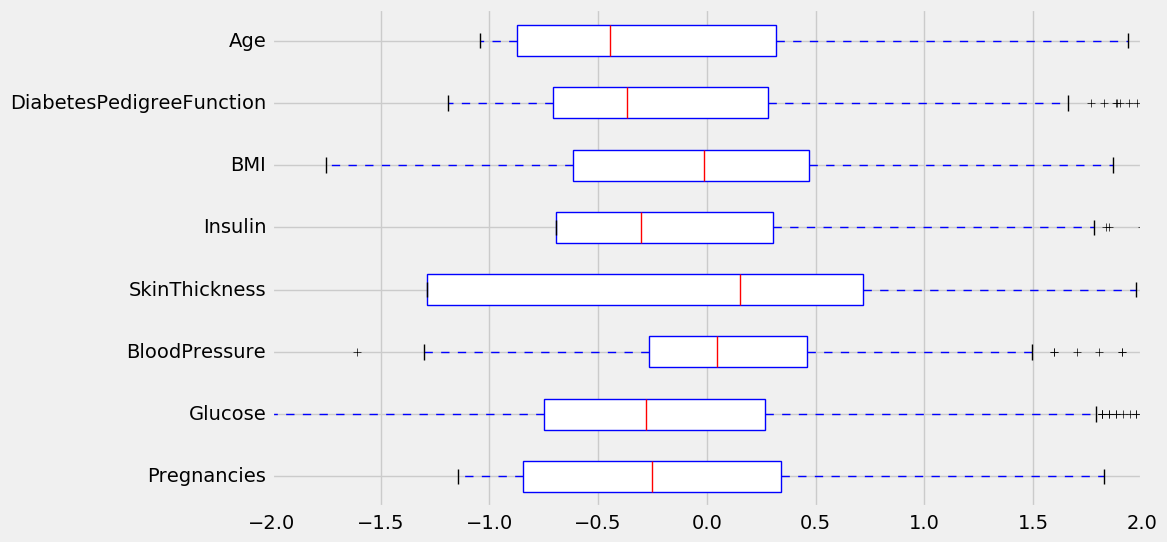

In [51]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
plt.boxplot(x_new,vert=False,labels=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],patch_artist=True)
plt.show()
#after removal of outlier

In [52]:
from sklearn.cross_validation import train_test_split

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x_new,y_new,test_size= 0.2,random_state = 0)

In [55]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((440, 8), (111, 8), (440,), (111,))

In [56]:
# building a machine learninng model
# Logistic regression,K-NN,SVM,Decu=ision tree,Random Forest

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [59]:
model_log=LogisticRegression(C=20.0)
model_kn=KNeighborsClassifier(n_neighbors=3)
model_svm=SVC(kernel='linear')
model_dt=DecisionTreeClassifier()
model_rf=RandomForestClassifier(n_estimators=100)

In [60]:
# training model
model_log.fit(x_train,y_train)
model_kn.fit(x_train,y_train)
model_svm.fit(x_train,y_train)
model_dt.fit(x_train,y_train)
model_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
print('Model Trained Sucessfully')

Model Trained Sucessfully


In [62]:
# model evaluation

In [64]:
y_log=model_log.predict(x_test)
y_knn=model_kn.predict(x_test)
y_svm=model_svm.predict(x_test)
y_dt=model_dt.predict(x_test)
y_rf=model_rf.predict(x_test)

In [65]:
from sklearn.metrics import confusion_matrix,classification_report

In [66]:
cm_log=confusion_matrix(y_test,y_log)
cm_knn=confusion_matrix(y_test,y_knn)
cm_svm=confusion_matrix(y_test,y_svm)
cm_dt=confusion_matrix(y_test,y_dt)
cm_rf=confusion_matrix(y_test,y_rf)

In [67]:
cr_log=classification_report(y_test,y_log)
cr_knn=classification_report(y_test,y_knn)
cr_svm=classification_report(y_test,y_svm)
cr_dt=classification_report(y_test,y_dt)
cr_rf=classification_report(y_test,y_rf)

In [68]:
cm_log

array([[74,  5],
       [16, 16]], dtype=int64)

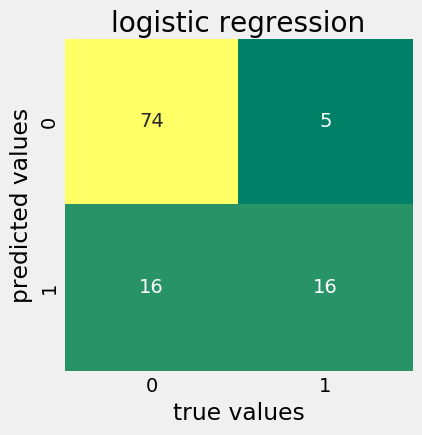

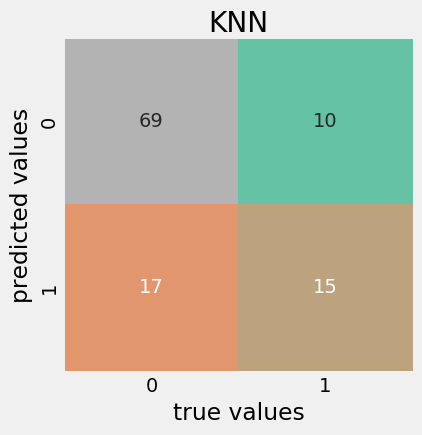

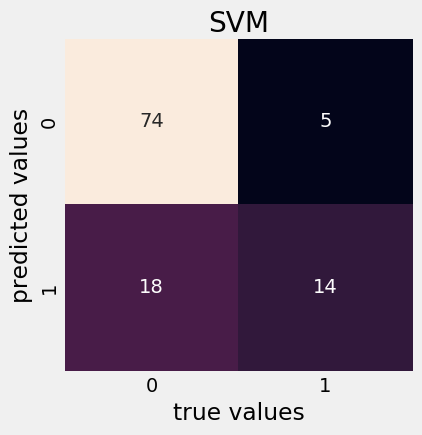

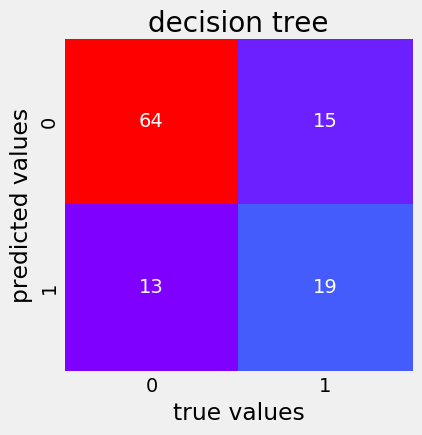

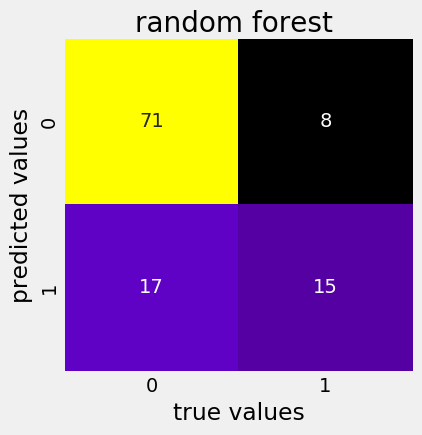

In [81]:
plt.figure(figsize=(4,4))
sns.heatmap(cm_log,annot=True,cbar=False,cmap='summer')
plt.title('logistic regression')
plt.xlabel('true values'),plt.ylabel('predicted values')
plt.show()#logistic regression
plt.figure(figsize=(4,4))
sns.heatmap(cm_knn,annot=True,cbar=False,cmap='Set2')
plt.title('KNN')
plt.xlabel('true values'),plt.ylabel('predicted values')
plt.show()
plt.figure(figsize=(4,4))
sns.heatmap(cm_svm,annot=True,cbar=False)
plt.title('SVM')
plt.xlabel('true values'),plt.ylabel('predicted values')
plt.show()
plt.figure(figsize=(4,4))
sns.heatmap(cm_dt,annot=True,cbar=False,cmap='rainbow')
plt.title('decision tree')
plt.xlabel('true values'),plt.ylabel('predicted values')
plt.show()
plt.figure(figsize=(4,4))
sns.heatmap(cm_rf,annot=True,cbar=False,cmap='gnuplot')
plt.title('random forest ')
plt.xlabel('true values'),plt.ylabel('predicted values')
plt.show()#logistic regression


In [86]:
print(cr_log)

             precision    recall  f1-score   support

          0       0.82      0.94      0.88        79
          1       0.76      0.50      0.60        32

avg / total       0.80      0.81      0.80       111



In [87]:
print(cr_svm)

             precision    recall  f1-score   support

          0       0.80      0.94      0.87        79
          1       0.74      0.44      0.55        32

avg / total       0.78      0.79      0.77       111



In [88]:
print(cr_rf)

             precision    recall  f1-score   support

          0       0.81      0.90      0.85        79
          1       0.65      0.47      0.55        32

avg / total       0.76      0.77      0.76       111



In [89]:
print(cr_dt)

             precision    recall  f1-score   support

          0       0.83      0.81      0.82        79
          1       0.56      0.59      0.58        32

avg / total       0.75      0.75      0.75       111



In [90]:
print(cr_knn)

             precision    recall  f1-score   support

          0       0.80      0.87      0.84        79
          1       0.60      0.47      0.53        32

avg / total       0.74      0.76      0.75       111

